# Data extraction and preprocessing

In [ ]:
import pandas as pd

In [ ]:
# dataset is loaded from my GoogleDisk
sentences_df = pd.read_excel('sentences_dataset.xlsx')

In [ ]:
sentences_df = sentences_df.drop('Unnamed: 0', axis=1)

In [ ]:
sentences_df

,Sentence,Source tag,Propaganda strategy tag
0,Боевики Вооруженных сил Украины (ВСУ) обстреля...,0.0,2.0
1,Уголь везли два грузовых автомобиля в один из ...,0.0,0.0
2,"Ганчев уточнил, что первые удары были нанесены...",0.0,0.0
3,После этого боевики расстреляли «КамАЗы» из РС...,0.0,2.0
4,"Также он опубликовал фото грузовика, пораженно...",0.0,0.0
...,...,...,...
14998,NaN,NaN,NaN
14999,Арбитражный суд Крыма зарегистрировал иск о вз...,2.0,0.0
15000,"Размер претензий составляет более 3,156 трилли...",2.0,0.0
15001,"По словам Константинова, республиканский парла...",2.0,0.0


In [ ]:
sentences_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15003 entries, 0 to 15002
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sentence                 14518 non-null  object 
 1   Source tag               14600 non-null  float64
 2   Propaganda strategy tag  14600 non-null  float64
dtypes: float64(2), object(1)
memory usage: 351.8+ KB


deleting all collumns with no text or no label

In [ ]:
sentences_df = sentences_df.dropna()
sentences_df

,Sentence,Source tag,Propaganda strategy tag
0,Боевики Вооруженных сил Украины (ВСУ) обстреля...,0.0,2.0
1,Уголь везли два грузовых автомобиля в один из ...,0.0,0.0
2,"Ганчев уточнил, что первые удары были нанесены...",0.0,0.0
3,После этого боевики расстреляли «КамАЗы» из РС...,0.0,2.0
4,"Также он опубликовал фото грузовика, пораженно...",0.0,0.0
...,...,...,...
14997,Причина смерти не разглашается.,2.0,0.0
14999,Арбитражный суд Крыма зарегистрировал иск о вз...,2.0,0.0
15000,"Размер претензий составляет более 3,156 трилли...",2.0,0.0
15001,"По словам Константинова, республиканский парла...",2.0,0.0


since all tags in our set initially were ints, we tranform them to ints

In [ ]:
sentences_df[['Source tag', 'Propaganda strategy tag']] = sentences_df[['Source tag', 'Propaganda strategy tag']].astype('int32')

<ipython-input-7-02cdf1e6ff68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentences_df[['Source tag', 'Propaganda strategy tag']] = sentences_df[['Source tag', 'Propaganda strategy tag']].astype('int32')


deleting all non propaganda sentences

In [ ]:
sentences_df = sentences_df[sentences_df['Propaganda strategy tag'] != 0]
sentences_df

,Sentence,Source tag,Propaganda strategy tag
0,Боевики Вооруженных сил Украины (ВСУ) обстреля...,0,2
3,После этого боевики расстреляли «КамАЗы» из РС...,0,2
5,Повторный обстрел из реактивной системы уничто...,0,4
6,"Накануне Минобороны РФ сообщило, что российски...",0,10
7,"Отмечается, что было нанесено поражение живой ...",0,2
...,...,...,...
14902,Такое заявление в своей авторской колонке на м...,2,10
14903,Однако на практике ничего подобного не происхо...,2,10
14904,Ранее глава издания Analisi Difesa Джанандреа ...,2,10
14946,Писториус указал на геополитическую важность р...,2,10


while labeling, we discovered many duplicate sentences, that's why we delete them now

In [ ]:
sentences_df = sentences_df.drop_duplicates()
sentences_df

,Sentence,Source tag,Propaganda strategy tag
0,Боевики Вооруженных сил Украины (ВСУ) обстреля...,0,2
3,После этого боевики расстреляли «КамАЗы» из РС...,0,2
5,Повторный обстрел из реактивной системы уничто...,0,4
6,"Накануне Минобороны РФ сообщило, что российски...",0,10
7,"Отмечается, что было нанесено поражение живой ...",0,2
...,...,...,...
14902,Такое заявление в своей авторской колонке на м...,2,10
14903,Однако на практике ничего подобного не происхо...,2,10
14904,Ранее глава издания Analisi Difesa Джанандреа ...,2,10
14946,Писториус указал на геополитическую важность р...,2,10


deleting all rare classes

In [ ]:
sentences_df = sentences_df[
    (sentences_df['Propaganda strategy tag'] == 1) |
    (sentences_df['Propaganda strategy tag'] == 2) |
    (sentences_df['Propaganda strategy tag'] == 4) |
    (sentences_df['Propaganda strategy tag'] == 10)
    ]
sentences_df

,Sentence,Source tag,Propaganda strategy tag
0,Боевики Вооруженных сил Украины (ВСУ) обстреля...,0,2
3,После этого боевики расстреляли «КамАЗы» из РС...,0,2
5,Повторный обстрел из реактивной системы уничто...,0,4
6,"Накануне Минобороны РФ сообщило, что российски...",0,10
7,"Отмечается, что было нанесено поражение живой ...",0,2
...,...,...,...
14902,Такое заявление в своей авторской колонке на м...,2,10
14903,Однако на практике ничего подобного не происхо...,2,10
14904,Ранее глава издания Analisi Difesa Джанандреа ...,2,10
14946,Писториус указал на геополитическую важность р...,2,10


In [ ]:
sentences_df['Propaganda strategy tag'].unique()

array([ 2,  4, 10,  1], dtype=int32)

# Simple statistic analysis

visualizing a number of propagandistic sentences of each media source

<Axes: >

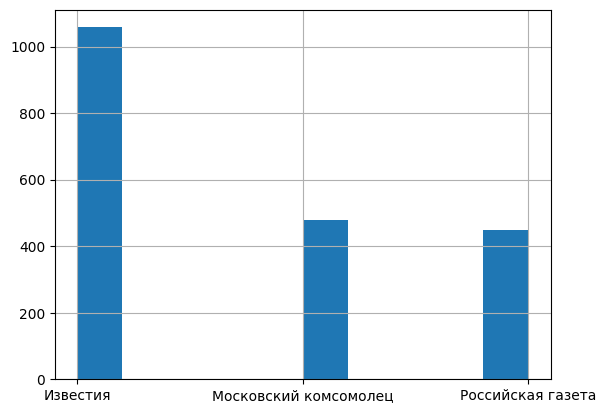

In [ ]:
sentences_df['Source tag'].replace({0: 'Известия', 1: 'Московский комсомолец', 2: 'Российская газета'}).hist()

In [ ]:
# мб сравнить распределения стратегий в каждом сми

# Text Augmentation

In [ ]:
from sklearn.model_selection import train_test_split

as we have only 2342 relevant sentences, it is not enough to train a DL-model, that's why we artificially increase the number of sentences by means of text augmentation tactics

<Axes: >

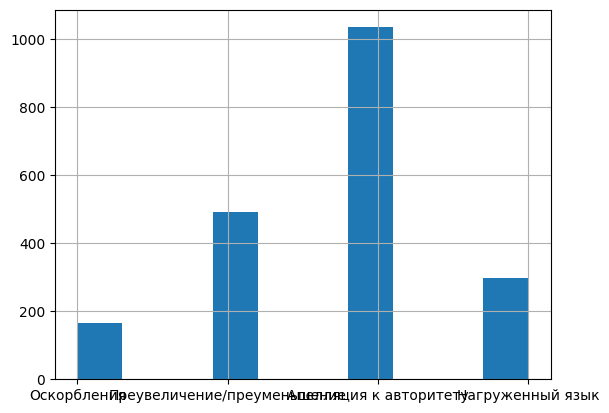

In [ ]:
sentences_df['Propaganda strategy tag'].replace({
    1: 'Нагруженный язык',
    2: 'Оскорбления',
    4: 'Преувеличение/преуменьшение',
    10: 'Апелляция к авторитету'}).hist()

We augment only train data, that's why we immediatly split our data into train and test. We split it in propotion 65/35 (as we have little data) and keep the classes balance

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    sentences_df['Sentence'],
    sentences_df['Propaganda strategy tag'],
    train_size=0.65,
    stratify=sentences_df['Propaganda strategy tag']
)

In [ ]:
train_df = pd.DataFrame({'Sentence': X_train, 'Propaganda strategy tag': y_train})
train_df

,Sentence,Propaganda strategy tag
7971,"Ранее Бербок заявила, что Европейский союз не ...",10
14013,"Дипломат напомнил о вторжениях США в Ливию, Ир...",10
12312,Только в декабре пограничники задержали более ...,4
10598,В Харькове жестоко избили украинского нациста-...,1
13023,"Об этом сообщает Forbes.""К западу от Авдеевки ...",4
...,...,...
14227,"Это делается для того, чтобы солдаты не могли ...",2
12677,"В ходе беседы с журналистами она заявила, что ...",10
5613,"Певица Алла Пугачева заявила, что люди, которы...",2
9283,"Также президент отмечал, что залог будущего Ро...",10


In [ ]:
test_df = pd.DataFrame({'Sentence': X_test, 'Propaganda strategy tag': y_test})
test_df

,Sentence,Propaganda strategy tag
10593,Бывший депутат Верховной рады Украины Игорь Мо...,2
7070,"Ровно как и британские, французские и даже нем...",4
6960,"Кроме того, журналисты назвали сказками на ноч...",10
3527,"Он отметил, что пятая статья устава НАТО не яв...",10
5964,"Однако, как отметил Полянский, в тот день в Од...",1
...,...,...
10182,Но с тех пор ситуация изменилась. «Момент торж...,10
9104,При этом сама идея подобной отмены не выдержив...,10
3446,Под изменениями мы понимаем необходимость возв...,10
9032,Парламентарий назвал действия Киева попыткой о...,10


In [ ]:
test_df.to_excel('test_df.xlsx')

In [ ]:
!pip install nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 8.1 MB/s eta 0:00:00


In [ ]:
import nlpaug.augmenter.word as naw

In [ ]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

As 3 of 4 of our propaganda strategies are based on key words, we will use text augmentations with contextual word insertion to prevent important data leaking. We will use it twice.

Then we will also try back translation technique.

In [ ]:
augm_word = naw.ContextualWordEmbsAug(
    model_path='DeepPavlov/rubert-base-cased',
    action="insert",
    aug_p = 0.1,
    device=str(device))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

In [ ]:
aug_translation = naw.back_translation.BackTranslationAug(
                from_model_name="Helsinki-NLP/opus-mt-ru-en",
                to_model_name='Helsinki-NLP/opus-mt-en-ru',
                device=str(device))

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/307M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/307M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/803k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.60M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/803k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.60M [00:00<?, ?B/s]

In [ ]:
sentences_list = list(train_df['Sentence'])

### 1. First word insertion by contextual word embeddings

In [ ]:
first_word_augm = augm_word.augment(sentences_list)

let's compare real and generated sentences

In [ ]:
sentences_list[140:150]

['Каллас отметила, что ее выдвижение в кандидаты помогло бы продвигать интересы государства вовне, однако она предполагает, что для этого есть другие методы.',
 'Кроме того, он отметил волонтеров, которые «вносят свой огромный вклад в общее дело».ВСУ пытаются наносить удары по российским территориям на фоне спецоперации в Донбассе, о начале которой было объявлено 24 февраля 2022 года.',
 'Если до февраля 2022 года Германия была лидером стран ЕС и двигателем европейской экономики, в том числе благодаря развивающимся связям с Россией, то после начала специальной военной операции в стране начался упадок из-за давления США.«Что мы сейчас видим — протесты, которые набирают всё больший и больший оборот, растут, как снежный ком.',
 'Зенитчики российской группировки войск «Восток» работают на самых жарких участках линии боевого соприкосновения, в частности в районе села Приютное, где продолжаются бои не только на земле, но и в воздухе.',
 'Он отметил, что Россия всегда выступала и выступает за

In [ ]:
first_word_augm[140:150]

['Юлия Каллас отметила, что поначалу ее выдвижение в кандидаты помогло бы продвигать интересы государства общество вовне, однако она предполагает, что для этого есть другие методы.',
 'Кроме того, вновь он отметил приход волонтеров, которые « вносят свой огромный значительный вклад в общее дело ». ВСУ пытаются постоянно наносить удары по российским территориям на фоне спецоперации в Большом Донбассе, о начале которой было объявлено 24 февраля 2022 года.',
 'Если до февраля 204 2022 года Германия была лидером стран ЕС и двигателем европейской внешней экономики, в том числе благодаря развивающимся связям с Россией, то после начала специальной военной операции в стране начался патриотический упадок из - за давления правительства США. « Что мы сейчас видим — протесты, которые быстро набирают всё и больший и больший оборот, растут, — как снежный ком.',
 'Зенитчики российской группировки войск « Востоке Восток » работают на самых жарких участках линии боевого соприкосновения, в частности даж

### 2. Second word insertion by contextual word embeddings

In [ ]:
second_word_augm = augm_word.augment(sentences_list)

let's compare real and generated sentences

In [ ]:
sentences_list[140:150]

['Каллас отметила, что ее выдвижение в кандидаты помогло бы продвигать интересы государства вовне, однако она предполагает, что для этого есть другие методы.',
 'Кроме того, он отметил волонтеров, которые «вносят свой огромный вклад в общее дело».ВСУ пытаются наносить удары по российским территориям на фоне спецоперации в Донбассе, о начале которой было объявлено 24 февраля 2022 года.',
 'Если до февраля 2022 года Германия была лидером стран ЕС и двигателем европейской экономики, в том числе благодаря развивающимся связям с Россией, то после начала специальной военной операции в стране начался упадок из-за давления США.«Что мы сейчас видим — протесты, которые набирают всё больший и больший оборот, растут, как снежный ком.',
 'Зенитчики российской группировки войск «Восток» работают на самых жарких участках линии боевого соприкосновения, в частности в районе села Приютное, где продолжаются бои не только на земле, но и в воздухе.',
 'Он отметил, что Россия всегда выступала и выступает за

In [ ]:
second_word_augm[140:150]

['Каллас отметила, что ее выдвижение в кандидаты помогло бы продвигать основные интересы государства вовне, однако же она предполагает, что для этого там есть другие методы.',
 'Кроме того, он отметил использование волонтеров, которые « одновременно вносят свой огромный вклад также в общее военное дело ». ВСУ пытаются наносить удары по российским территориям на фоне спецоперации в Северном Донбассе, о начале которой было объявлено 24 февраля 2022 года.',
 'Если до февраля 2019 2022 года Германия была лидером 28 стран ЕС и двигателем европейской экономики, также в том как числе благодаря развивающимся связям с Россией, то после начала специальной немецкой военной операции в стране неожиданно начался упадок из - за давления США. « Что здесь мы сейчас видим — протесты, которые набирают всё больший и больший оборот, растут, как снежный ком.',
 'Зенитчики войск российской группировки войск « Восток » работают на самых жарких участках линии боевого соприкосновения, в частности в районе села 

### 3. Back translation

In [ ]:
back_translation = aug_translation.augment(sentences_list)

In [ ]:
sentences_list[140:150]

['Каллас отметила, что ее выдвижение в кандидаты помогло бы продвигать интересы государства вовне, однако она предполагает, что для этого есть другие методы.',
 'Кроме того, он отметил волонтеров, которые «вносят свой огромный вклад в общее дело».ВСУ пытаются наносить удары по российским территориям на фоне спецоперации в Донбассе, о начале которой было объявлено 24 февраля 2022 года.',
 'Если до февраля 2022 года Германия была лидером стран ЕС и двигателем европейской экономики, в том числе благодаря развивающимся связям с Россией, то после начала специальной военной операции в стране начался упадок из-за давления США.«Что мы сейчас видим — протесты, которые набирают всё больший и больший оборот, растут, как снежный ком.',
 'Зенитчики российской группировки войск «Восток» работают на самых жарких участках линии боевого соприкосновения, в частности в районе села Приютное, где продолжаются бои не только на земле, но и в воздухе.',
 'Он отметил, что Россия всегда выступала и выступает за

In [ ]:
back_translation[140:150]

['Каллас отметила, что ее назначение будет способствовать продвижению интересов государства за пределами страны, однако она полагает, что для этого имеются и другие методы.',
 'Кроме того, он отметил добровольцев, которые «вкладывают огромный вклад в общее дело».',
 'В то время как до февраля 2022 года Германия была лидером стран ЕС и движущей силой европейской экономики, в том числе благодаря расширяющимся связям с Россией, страна начала упадок после начала специальной военной операции под давлением США.',
 'Российская группа "Восток" работает над наиболее горячими участками линии связи, в частности в районе деревни Убежище, где боевые действия продолжаются не только на земле, но и в воздухе.',
 'Он отметил, что Россия всегда выступала за восстановление контактов с Молдовой.',
 'Компания &quot; Бизнес инсайдер &quot; сообщила, что командование Украинских вооруженных сил совершило серьезные ошибки в планировании обороны в районе Авдеевки.',
 'Пресс-секретарь Председателя охарактеризова

### Creating and savind augmented dataset

In [ ]:
first_word_augm_df = pd.DataFrame({
    'Sentence': first_word_augm,
    'Propaganda strategy tag': list(train_df['Propaganda strategy tag'])
}, index=range(15000, 16290))
first_word_augm_df

,Sentence,Propaganda strategy tag
15000,"Ранее Бербок заявила, что Европейский союз не ...",10
15001,Дипломат напомнил о вторжениях США в западную ...,10
15002,Только в декабре пограничники Аляски задержали...,4
15003,В Харькове жестоко жестоко избили украинского ...,1
15004,"РФ Об этом сообщает Forbes. "" К западу также о...",4
...,...,...
16285,"Это делается для того, чтобы солдаты не могли ...",2
16286,России В ходе беседы с журналистами она заявил...,10
16287,артистов Певица Алла Борисовна Пугачева заявил...,2
16288,"Также Российский президент отмечал, что залог ...",10


In [ ]:
second_word_augm_df = pd.DataFrame({
    'Sentence': second_word_augm,
    'Propaganda strategy tag': list(train_df['Propaganda strategy tag'])
}, index=range(16290, 17580))
second_word_augm_df

,Sentence,Propaganda strategy tag
16290,"Ранее Бербок заявила, что теперь Европейский и...",10
16291,Дипломат МИД напомнил о вторжениях США в Ливию...,10
16292,Только в этом декабре пограничники задержали б...,4
16293,В Харькове жестоко избили украинского нациста ...,1
16294,"Об этом сообщает Forbes. "" К к западу неподале...",4
...,...,...
17575,"Это делается для того, чтобы солдаты не могли ...",2
17576,В ходе беседы с украинскими журналистами она т...,10
17577,"Певица Бейонсе Алла Мария Пугачева заявила, чт...",2
17578,"Также президент отмечал, подчеркивает что зало...",10


In [ ]:
back_translation_df = pd.DataFrame({
    'Sentence': back_translation,
    'Propaganda strategy tag': list(train_df['Propaganda strategy tag'])
}, index=range(17580, 18870))
back_translation_df

,Sentence,Propaganda strategy tag
17580,"Ранее Бербок заявил, что Европейский союз не м...",10
17581,"Дипломат напомнил о вторжении США в Ливию, Ира...",10
17582,Только в декабре пограничники задержали более ...,4
17583,В Харькове был жестоко избит украинский нацист...,1
17584,Об этом сообщает Форбс. «К западу от Авдеевки ...,4
...,...,...
18865,"Это делается для того, чтобы не дать солдатам ...",2
18866,"В своем интервью журналистам она заявила, что ...",10
18867,"Певец, Алла Пугачев, утверждал, что люди, кото...",2
18868,"Президент также заявил, что ключ к будущему Ро...",10


In [ ]:
augm_train_df = pd.concat([
    train_df,
    first_word_augm_df,
    second_word_augm_df,
    back_translation_df
], axis=0)
augm_train_df

,Sentence,Propaganda strategy tag
7971,"Ранее Бербок заявила, что Европейский союз не ...",10
14013,"Дипломат напомнил о вторжениях США в Ливию, Ир...",10
12312,Только в декабре пограничники задержали более ...,4
10598,В Харькове жестоко избили украинского нациста-...,1
13023,"Об этом сообщает Forbes.""К западу от Авдеевки ...",4
...,...,...
18865,"Это делается для того, чтобы не дать солдатам ...",2
18866,"В своем интервью журналистам она заявила, что ...",10
18867,"Певец, Алла Пугачев, утверждал, что люди, кото...",2
18868,"Президент также заявил, что ключ к будущему Ро...",10


In [ ]:
# we save our result not to augment data again later
augm_train_df.to_excel('augm_train_dataset.xlsx', sheet_name='Augmented Sentences Dataset')

# Architecture development and training

In [1]:
import torch
import transformers
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

In [2]:
import random
import os

def seed_everything(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

We are going to develop the Attention-based-BiLSTM architecture, trained on 4-label classification

### Data preparation

In [5]:
# here we load sentences, that we have got by means of augmentation
augm_train_df = pd.read_excel('augm_train_dataset.xlsx')
augm_train_df = augm_train_df.drop('Unnamed: 0', axis=1)

In [6]:
augm_train_df

,Sentence,Propaganda strategy tag
0,"Ранее Бербок заявила, что Европейский союз не ...",10
1,"Дипломат напомнил о вторжениях США в Ливию, Ир...",10
2,Только в декабре пограничники задержали более ...,4
3,В Харькове жестоко избили украинского нациста-...,1
4,"Об этом сообщает Forbes.""К западу от Авдеевки ...",4
...,...,...
5155,"Это делается для того, чтобы не дать солдатам ...",2
5156,"В своем интервью журналистам она заявила, что ...",10
5157,"Певец, Алла Пугачев, утверждал, что люди, кото...",2
5158,"Президент также заявил, что ключ к будущему Ро...",10


In [7]:
augm_train_df.loc[augm_train_df["Propaganda strategy tag"] == 10, "Propaganda strategy tag"] = 3
augm_train_df.loc[augm_train_df["Propaganda strategy tag"] == 4, "Propaganda strategy tag"] = 0

In [8]:
augm_train_df

,Sentence,Propaganda strategy tag
0,"Ранее Бербок заявила, что Европейский союз не ...",3
1,"Дипломат напомнил о вторжениях США в Ливию, Ир...",3
2,Только в декабре пограничники задержали более ...,0
3,В Харькове жестоко избили украинского нациста-...,1
4,"Об этом сообщает Forbes.""К западу от Авдеевки ...",0
...,...,...
5155,"Это делается для того, чтобы не дать солдатам ...",2
5156,"В своем интервью журналистам она заявила, что ...",3
5157,"Певец, Алла Пугачев, утверждал, что люди, кото...",2
5158,"Президент также заявил, что ключ к будущему Ро...",3


In [9]:
test_df = pd.read_excel('test_df.xlsx')
test_df = test_df.drop('Unnamed: 0', axis=1)

In [10]:
test_df

,Sentence,Propaganda strategy tag
0,Бывший депутат Верховной рады Украины Игорь Мо...,2
1,"Ровно как и британские, французские и даже нем...",4
2,"Кроме того, журналисты назвали сказками на ноч...",10
3,"Он отметил, что пятая статья устава НАТО не яв...",10
4,"Однако, как отметил Полянский, в тот день в Од...",1
...,...,...
691,Но с тех пор ситуация изменилась. «Момент торж...,10
692,При этом сама идея подобной отмены не выдержив...,10
693,Под изменениями мы понимаем необходимость возв...,10
694,Парламентарий назвал действия Киева попыткой о...,10


In [11]:
test_df.loc[test_df["Propaganda strategy tag"] == 10, "Propaganda strategy tag"] = 3
test_df.loc[test_df["Propaganda strategy tag"] == 4, "Propaganda strategy tag"] = 0
test_df

,Sentence,Propaganda strategy tag
0,Бывший депутат Верховной рады Украины Игорь Мо...,2
1,"Ровно как и британские, французские и даже нем...",0
2,"Кроме того, журналисты назвали сказками на ноч...",3
3,"Он отметил, что пятая статья устава НАТО не яв...",3
4,"Однако, как отметил Полянский, в тот день в Од...",1
...,...,...
691,Но с тех пор ситуация изменилась. «Момент торж...,3
692,При этом сама идея подобной отмены не выдержив...,3
693,Под изменениями мы понимаем необходимость возв...,3
694,Парламентарий назвал действия Киева попыткой о...,3


### Training baseline model

Following Da San Martino et al., 2020 we will define a baseline model: logistic regression classifier, trained on sentences lenght.

In [12]:
X_train_base = np.array(augm_train_df['Sentence'].apply(len)).reshape(-1, 1)
y_train_base = augm_train_df['Propaganda strategy tag']

X_test_base = np.array(test_df['Sentence'].apply(len)).reshape(-1, 1)
y_test_base = test_df['Propaganda strategy tag']

In [13]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train_base, y_train_base)
prediction = logreg.predict(X_test_base)

print(f'macro-averaged f1-score: {f1_score(prediction, y_test_base, average="macro")}')

macro-averaged f1-score: 0.17107750472589792


In [14]:
print(f'macro-averaged f1-score: {f1_score(prediction, y_test_base, average="macro")}')

macro-averaged f1-score: 0.17107750472589792


### Defining Dataset and DataLoader

In [15]:
class NewsSentencesDataset(Dataset):

    def __init__(self, X, y, tokenizer, max_len):
        self.y = y
        self.X = X
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):

        sent = str(self.X[idx])

        encoding = self.tokenizer.encode_plus(
                sent,
                add_special_tokens=True,
                max_length=self.max_len,
                return_token_type_ids=False,
                padding='max_length',
                return_attention_mask=True,
                return_tensors='pt',
            )

        return {
                'text': sent,
                'input_ids': encoding['input_ids'].flatten(),
                'attention_mask': encoding['attention_mask'].flatten(),
                'targets': torch.tensor(self.y[idx], dtype=torch.long)
              }

In [16]:
X_train = np.array(augm_train_df['Sentence'])
y_train = np.array(augm_train_df['Propaganda strategy tag'])

X_test = np.array(test_df['Sentence'])
y_test = np.array(test_df['Propaganda strategy tag'])

In [17]:
train_lens = X_train_base.reshape(1, -1)
test_lens = X_test_base.reshape(1, -1)

In [18]:
TRAIN_MAX_LEN = max(train_lens[0])
TEST_MAX_LEN = max(test_lens[0])

In [19]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('cointegrated/rubert-tiny')
train_dataset = NewsSentencesDataset(list(X_train), list(y_train), tokenizer, TRAIN_MAX_LEN)
test_dataset = NewsSentencesDataset(list(X_test), list(y_test), tokenizer, TEST_MAX_LEN)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/241k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/468k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/632 [00:00<?, ?B/s]

In [20]:
train_dataset[0]

{'text': 'Ранее Бербок заявила, что Европейский союз не может позволить себе никаких серых зон в Европе, выгодных Москве, и назвала расширение объединения на Балканы необходимым с геополитической точки зрения.',
 'input_ids': tensor([    2,   296,  9596,   626,   281,  1813, 19002, 16191,   603,    16,
          1046, 11652, 10135, 17374,   769,  3960,   705, 28470, 13633,  1348,
          4404,  5548,   872,  4866,   689, 28922,   319,  1561,   314, 11652,
            16, 26629,  1172, 21514,  7604,    16,   320, 23476,   603,   328,
          4992, 26232,  4030, 22978,   548, 27610,  9772,  1385,   769, 10658,
         18165, 23292,   329, 19783, 17947, 13633, 13505,  9047, 15170,    18,
             3,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,

### Building a model

In [21]:
class AttentionLayer(nn.Module):

    def __init__(self, hidden):
        super().__init__()
        self.attention = nn.Linear(hidden, 1, bias=False)

    def forward(self, lstm_output):
        att_scores = self.attention(lstm_output).squeeze(2)
        return F.softmax(att_scores, dim=1)

In [22]:
class AttentionBiLSTMClassifier(nn.Module):

    def __init__(self,
                tokenizer,
                embedding=128,
                hidden=256,
                output=4,
                n_layers=2,
                bidirectional=True,
                dropout=0.1,
        ):
        super().__init__()

        # embedding layer
        len_tokenizer_vocab = len(tokenizer.get_vocab())
        self.embed = nn.Embedding(len_tokenizer_vocab, embedding)

        # BiLSTM layers
        self.bi_lstm = nn.LSTM(
                  embedding,
                  hidden,
                  num_layers=n_layers,
                  bidirectional=bidirectional,
                  dropout=dropout,
                  batch_first=True,
              )
        # attention layer
        self.att = AttentionLayer(hidden * 2)

        # fully-connected layers
        self.fc = nn.Sequential(
            nn.Linear(hidden * 2, output)
        )

        # activation
        self.act = nn.Sigmoid()

    def forward(self, X):
        embeddings = self.embed(X)
        lstm_output, (hidden, _) = self.bi_lstm(embeddings)

        # hidden = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1) # https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        attention_weights = self.att(lstm_output).unsqueeze(2)
        weighted_output = lstm_output * attention_weights

        weighted_sum = weighted_output.sum(dim=1)
        dense_outputs = self.fc(weighted_sum)

        return self.act(dense_outputs)

### Model training

In [23]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00


In [24]:
import wandb

In [25]:
from tqdm.notebook import tqdm

In [26]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

device(type='cuda', index=0)

In [27]:
def train(epoch, model, optimizer, loss, train_loader):

    train_loss = 0.0
    for batch in tqdm(train_loader):
        text_vector = batch['input_ids'].to(device)
        label = batch['targets'].to(device)

        optimizer.zero_grad()

        y_pred = model(text_vector).to(device)
        loss_value = loss(y_pred, label)
        train_loss += loss_value.item()

        loss_value.backward()
        optimizer.step()

    train_loss_avg = train_loss / len(train_loader.dataset)
    print(f'train: epoch: {epoch+1} -- Cross entropy loss: {train_loss_avg}')

    return train_loss_avg

In [28]:
def validation(epoch, model, loss, test_loader):

    test_loss = 0.0
    for batch in tqdm(test_loader):
        text_vector = batch['input_ids'].to(device)
        label = batch['targets'].to(device)

        with torch.no_grad():
            y_test_pred = model(text_vector).to(device)
            loss_score = loss(y_test_pred, label)
        test_loss += loss_score.item()

    test_loss_avg = test_loss / len(test_loader.dataset)
    print(f'test: epoch: {epoch+1} -- Cross entropy loss: {test_loss_avg}')

    return test_loss_avg


let's define all important model training and testing parameters

In [37]:
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=32, num_workers=4)
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=32, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [38]:
# constants
EMBEDDING = 300
HIDDEN = 256
OUTPUT = 4
DROUPOUT = 0
LR = 0.001
NUM_EPOCHS = 10

In [39]:
prop_classification_model = AttentionBiLSTMClassifier(tokenizer,
                embedding=EMBEDDING,
                hidden=HIDDEN,
                output=OUTPUT,
                n_layers=2,
                bidirectional=True,
                dropout=DROUPOUT).to(device)

# optimizer = torch.optim.SGD(prop_classification_model.parameters(), lr=LR)
optimizer = torch.optim.Adam(prop_classification_model.parameters(), lr=LR)
# scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, gamma=0.1, milestones=[6,7,8])
loss = nn.CrossEntropyLoss()

In [32]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [40]:
wandb.init(project="propaganda-detection-ABL-model")
wandb.watch(prop_classification_model)

for epoch in range(NUM_EPOCHS):

    prop_classification_model.train()
    train_loss = train(epoch, prop_classification_model, optimizer, loss, train_dataloader)

    wandb.log(
                    {"mean train loss": train_loss}
                )

    prop_classification_model.eval()
    val_loss = validation(epoch, prop_classification_model, loss, test_dataloader)

    wandb.log(
                    {"mean val loss": val_loss}
                )

    # scheduler.step()

  0%|          | 0/162 [00:00<?, ?it/s]

train: epoch: 1 -- Cross entropy loss: 0.03774521957303202


  0%|          | 0/22 [00:00<?, ?it/s]

test: epoch: 1 -- Cross entropy loss: 0.03807781551076078


  0%|          | 0/162 [00:00<?, ?it/s]

train: epoch: 2 -- Cross entropy loss: 0.03582269811584044


  0%|          | 0/22 [00:00<?, ?it/s]

test: epoch: 2 -- Cross entropy loss: 0.03726068961209264


  0%|          | 0/162 [00:00<?, ?it/s]

train: epoch: 3 -- Cross entropy loss: 0.036973587452441226


  0%|          | 0/22 [00:00<?, ?it/s]

test: epoch: 3 -- Cross entropy loss: 0.03814510041954874


  0%|          | 0/162 [00:00<?, ?it/s]

train: epoch: 4 -- Cross entropy loss: 0.0376395702824112


  0%|          | 0/22 [00:00<?, ?it/s]

test: epoch: 4 -- Cross entropy loss: 0.03800079843093609


  0%|          | 0/162 [00:00<?, ?it/s]

train: epoch: 5 -- Cross entropy loss: 0.03751309172127598


  0%|          | 0/22 [00:00<?, ?it/s]

test: epoch: 5 -- Cross entropy loss: 0.03799221279292271


  0%|          | 0/162 [00:00<?, ?it/s]

train: epoch: 6 -- Cross entropy loss: 0.03685138931339101


  0%|          | 0/22 [00:00<?, ?it/s]

test: epoch: 6 -- Cross entropy loss: 0.037905016849780905


  0%|          | 0/162 [00:00<?, ?it/s]

train: epoch: 7 -- Cross entropy loss: 0.03619911775801533


  0%|          | 0/22 [00:00<?, ?it/s]

test: epoch: 7 -- Cross entropy loss: 0.03794879594753529


  0%|          | 0/162 [00:00<?, ?it/s]

train: epoch: 8 -- Cross entropy loss: 0.03591031362844068


  0%|          | 0/22 [00:00<?, ?it/s]

test: epoch: 8 -- Cross entropy loss: 0.03848536552368909


  0%|          | 0/162 [00:00<?, ?it/s]

train: epoch: 9 -- Cross entropy loss: 0.03610967307589775


  0%|          | 0/22 [00:00<?, ?it/s]

test: epoch: 9 -- Cross entropy loss: 0.038599827851372205


  0%|          | 0/162 [00:00<?, ?it/s]

train: epoch: 10 -- Cross entropy loss: 0.03620720918095389


  0%|          | 0/22 [00:00<?, ?it/s]

test: epoch: 10 -- Cross entropy loss: 0.038539468728262805


In [34]:
wandb.finish()

mean train loss,█▇▆▅▅▅▅▅▂▁
mean val loss,▂▂▁▁▁█▃▅▁▃
mean train loss,0.03218
mean val loss,0.0385


### Model evaluation

In [35]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    f1_scores = 0.0
    for batch in test_dataloader:
        text_vector = batch['input_ids'].to(device)
        label = batch['targets'].to(device)

        with torch.no_grad():
            preds = model(text_vector)

        f1_batch = f1_score(preds.argmax(1).cpu(), label.cpu(), average="macro")
        f1_scores += f1_batch

    f1_scores /= len(test_dataloader)
    return f1_scores

In [36]:
evaluate_task(prop_classification_model, test_dataloader, device)

0.2713872306157045

In [ ]:
test_data = next(iter(DataLoader(test_dataset, batch_size=len(test_dataset))))

In [ ]:
len(test_data['text'])

696

In [ ]:
X_test_final = test_data['input_ids'].to(device)
y_test_final = test_data['targets'].to(device)
prop_classification_model = prop_classification_model.to(device)

with torch.no_grad():
    final_prediction = prop_classification_model(X_test_final)

In [ ]:
labels = final_prediction.argmax(1).cpu()

In [ ]:
real_labels = y_test_final.cpu()

In [ ]:
f1_score(labels, real_labels, average="macro")

0.4191088856387586

In [ ]:
pd.Series(labels).unique()

array([3, 0, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(real_labels, labels))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51       172
           1       0.45      0.39      0.42       104
           2       0.00      0.00      0.00        58
           3       0.69      0.82      0.75       362

    accuracy                           0.61       696
   macro avg       0.41      0.43      0.42       696
weighted avg       0.55      0.61      0.58       696



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


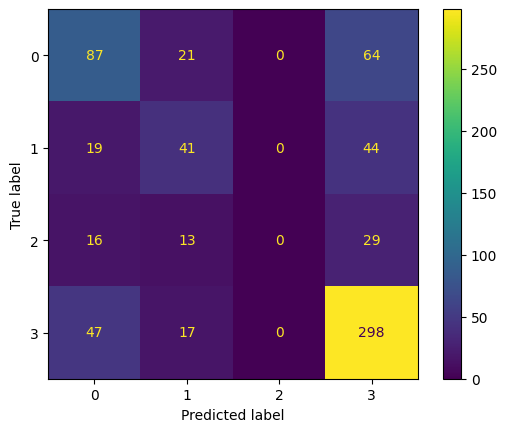

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix(real_labels, labels))
disp.plot()
plt.show()

### Save labeled data and best model

In [ ]:
final_df = pd.DataFrame({
    'Sentences': test_data['text'],
    'Propaganda strategy real tag': y_test_final.cpu(),
    'Propaganda strategy predicted tag': labels})


In [ ]:
final_df

,Sentences,Propaganda strategy real tag,Propaganda strategy predicted tag
0,Бывший депутат Верховной рады Украины Игорь Мо...,2,3
1,"Ровно как и британские, французские и даже нем...",0,0
2,"Кроме того, журналисты назвали сказками на ноч...",3,0
3,"Он отметил, что пятая статья устава НАТО не яв...",3,3
4,"Однако, как отметил Полянский, в тот день в Од...",1,0
...,...,...,...
691,Но с тех пор ситуация изменилась. «Момент торж...,3,3
692,При этом сама идея подобной отмены не выдержив...,3,0
693,Под изменениями мы понимаем необходимость возв...,3,3
694,Парламентарий назвал действия Киева попыткой о...,3,1


In [ ]:
final_df.to_excel('sentences_dataset_with_predictions.xlsx')

In [ ]:
torch.save(prop_classification_model, 'good_model.pkl')

# Inferencing best model

In [ ]:
import torch
import transformers
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
class AttentionLayer(nn.Module):

    def __init__(self, hidden):
        super().__init__()
        self.attention = nn.Linear(hidden, 1, bias=False)

    def forward(self, lstm_output):
        att_scores = self.attention(lstm_output).squeeze(2)
        return F.softmax(att_scores, dim=1)

In [ ]:
class AttentionBiLSTMClassifier(nn.Module):

    def __init__(self,
                tokenizer,
                embedding=128,
                hidden=256,
                output=4,
                n_layers=2,
                bidirectional=True,
                dropout=0.1,
        ):
        super().__init__()

        # embedding layer
        len_tokenizer_vocab = len(tokenizer.get_vocab())
        self.embed = nn.Embedding(len_tokenizer_vocab, embedding)

        # BiLSTM layers
        self.bi_lstm = nn.LSTM(
                  embedding,
                  hidden,
                  num_layers=n_layers,
                  bidirectional=bidirectional,
                  dropout=dropout,
                  batch_first=True,
              )
        # attention layer
        self.att = AttentionLayer(hidden * 2)

        # fully-connected layers
        self.fc = nn.Sequential(
            nn.Linear(hidden * 2, output)
        )

        # activation
        self.act = nn.Sigmoid()

    def forward(self, X):
        embeddings = self.embed(X)
        lstm_output, (hidden, _) = self.bi_lstm(embeddings)

        # hidden = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1) # https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        attention_weights = self.att(lstm_output).unsqueeze(2)
        weighted_output = lstm_output * attention_weights

        weighted_sum = weighted_output.sum(dim=1)
        dense_outputs = self.fc(weighted_sum)

        return self.act(dense_outputs)

In [ ]:
propaganda_detection_model = torch.load('best_model.pkl', map_location=torch.device(device))

In [ ]:
# trying to pass 2-labeled sentence to the model
sentence = "Следственный комитет (СК) РФ объявил в розыск более 700 иностранных наемников, воюющих в рядах Вооруженных сил Украины (ВСУ). Об этом 7 марта сообщили в ведомстве после оперативного совещания, которое провел в Донецке глава СК РФ Александр Бастрыкин.«На основании полученных доказательств вынесены постановления о привлечении в качестве обвиняемых заочно по ч. 3 ст."
propaganda_detection_model()